# A Sentiment Analysis of Yelp Reviews
## Author: Robert Surridge

### 1. Import necessary packages:

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rsurridge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Load the dataset with a sample of Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

#### a. 10,000 Yelp reviews:

In [3]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=10_000)
for chunk in yelp_data:
    yelp_sample_unequal_ten_thou = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_unequal_ten_thou['length'] = yelp_sample_unequal_ten_thou['text'].apply(len)
yelp_sample_unequal_ten_thou['stars'] = yelp_sample_unequal_ten_thou['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_unequal_ten_thou.shape)

print()
print("Column names:", yelp_sample_unequal_ten_thou.columns)

print()
print("Datatype of each column:")
print(yelp_sample_unequal_ten_thou.dtypes)

print()
print("A few dataset entries:")
print(yelp_sample_unequal_ten_thou.head())

print()
print("Dataset Summary:")
yelp_sample_unequal_ten_thou.describe(include='all')



Shape of the dataset: (10000, 10)

Column names: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'length'],
      dtype='object')

Datatype of each column:
review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
length                  int64
dtype: object

A few dataset entries:
                review_id                 user_id             business_id   
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw  \
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJ

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000
unique,10000,9472,3930,NaN,NaN,NaN,NaN,10000,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,n-lBS02-3yvlY5Q91mmwDA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,"If you decide to eat here, just be aware it is...",NaN,NaN
freq,1,6,85,NaN,NaN,NaN,NaN,1,NaN,NaN
mean,NaN,NaN,NaN,3.854300,0.889100,0.246500,0.335500,NaN,2015-04-17 08:27:40.820000,549.039100
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,26.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2013-11-14 11:16:35.500000,224.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2015-09-09 23:20:24,395.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2017-03-27 02:25:32.500000,694.250000
max,NaN,NaN,NaN,5.000000,91.000000,26.000000,44.000000,NaN,2018-10-04 18:22:35,4994.000000


#### b. 100,000 Yelp reviews:

In [5]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=100_000)
for chunk in yelp_data:
    yelp_sample_unequal_hund_thou = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_unequal_hund_thou['length'] = yelp_sample_unequal_hund_thou['text'].apply(len)
yelp_sample_unequal_hund_thou['stars'] = yelp_sample_unequal_hund_thou['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_unequal_hund_thou.shape)

print()
print("Dataset Summary:")
yelp_sample_unequal_hund_thou.describe(include='all')



Shape of the dataset: (100000, 10)

Dataset Summary:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,100000,79345,9973,NaN,NaN,NaN,NaN,99964,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,Service was a little slow to start but improve...,NaN,NaN
freq,1,65,950,NaN,NaN,NaN,NaN,2,NaN,NaN
mean,NaN,NaN,NaN,3.842910,0.898980,0.257180,0.347030,NaN,2015-05-02 14:36:08.625299968,548.438330
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,3.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2013-12-07 13:33:34.750000128,226.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2015-09-26 23:21:59.500000,395.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2017-04-08 12:26:05.249999872,693.000000
max,NaN,NaN,NaN,5.000000,320.000000,98.000000,49.000000,NaN,2018-10-04 18:22:35,5000.000000


#### c. 1,000,000 Yelp reviews:

In [6]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=1_000_000)
for chunk in yelp_data:
    yelp_sample_unequal_mil = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_unequal_mil['length'] = yelp_sample_unequal_mil['text'].apply(len)
yelp_sample_unequal_mil['stars'] = yelp_sample_unequal_mil['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_unequal_mil.shape)

print()
print("Dataset Summary:")
yelp_sample_unequal_mil.describe(include='all')


Shape of the dataset: (1000000, 10)

Dataset Summary:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000.000000
unique,1000000,542003,27095,NaN,NaN,NaN,NaN,998357,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,I have eaten at just about every decent Indian...,NaN,NaN
freq,1,483,4661,NaN,NaN,NaN,NaN,5,NaN,NaN
mean,NaN,NaN,NaN,3.783959,1.106594,0.307812,0.457129,NaN,2016-07-13 10:09:02.464016128,563.451724
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,1.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2014-08-07 16:29:16.500000,228.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2016-10-11 16:02:42,403.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2018-09-01 01:26:22.249999872,715.000000
max,NaN,NaN,NaN,5.000000,539.000000,284.000000,172.000000,NaN,2022-01-19 19:47:59,5000.000000


In [7]:
star_counts_ten_thou = yelp_sample_unequal_ten_thou['stars'].value_counts()
min_count = star_counts_ten_thou.min()
yelp_sample_equal_ten_thou = (yelp_sample_unequal_ten_thou
                              .groupby('stars')
                              .apply(lambda x: x[:min_count]))
count_ten_thou = yelp_sample_equal_ten_thou['stars'].value_counts()

print()
print("Unequal star count (10,000 reviews)")
print(star_counts_ten_thou)

print()
print("Equal star count (10,000 reviews)")
print(count_ten_thou)

star_counts_hund_thou = yelp_sample_unequal_hund_thou['stars'].value_counts()
min_count = star_counts_hund_thou.min()
yelp_sample_equal_hund_thou = (yelp_sample_unequal_hund_thou
                               .groupby('stars')
                               .apply(lambda x: x[:min_count]))
count_hund_thou = yelp_sample_equal_hund_thou['stars'].value_counts()

print()
print("Unequal star count (100,000 reviews)")
print(star_counts_hund_thou)

print()
print("Equal star count (100,000 reviews)")
print(count_hund_thou)

star_counts_mil = yelp_sample_unequal_mil['stars'].value_counts()
min_count = star_counts_mil.min()
yelp_sample_equal_mil = (yelp_sample_unequal_mil
                         .groupby('stars')
                         .apply(lambda x: x[:min_count]))
count_mil = yelp_sample_equal_mil['stars'].value_counts()

print()
print("Unequal star count (1,000,000 reviews)")
print(star_counts_mil)

print()
print("Equal star count (1,000,000 reviews)")
print(count_mil)



Unequal star count (10,000 reviews)
stars
5.0    4445
4.0    2574
3.0    1139
1.0    1079
2.0     763
Name: count, dtype: int64

Equal star count (10,000 reviews)
stars
1.0    763
2.0    763
3.0    763
4.0    763
5.0    763
Name: count, dtype: int64

Unequal star count (100,000 reviews)
stars
5.0    44392
4.0    25337
3.0    11362
1.0    10921
2.0     7988
Name: count, dtype: int64

Equal star count (100,000 reviews)
stars
1.0    7988
2.0    7988
3.0    7988
4.0    7988
5.0    7988
Name: count, dtype: int64

Unequal star count (1,000,000 reviews)
stars
5.0    458612
4.0    221897
1.0    138625
3.0    102954
2.0     77912
Name: count, dtype: int64

Equal star count (1,000,000 reviews)
stars
1.0    77912
2.0    77912
3.0    77912
4.0    77912
5.0    77912
Name: count, dtype: int64


### 3. Plot histograms of review length frenquencies by the star rating:

Text(0.5, 1.0, 'Star Rating Frequency with a RAW Sample of One Million Reviews')

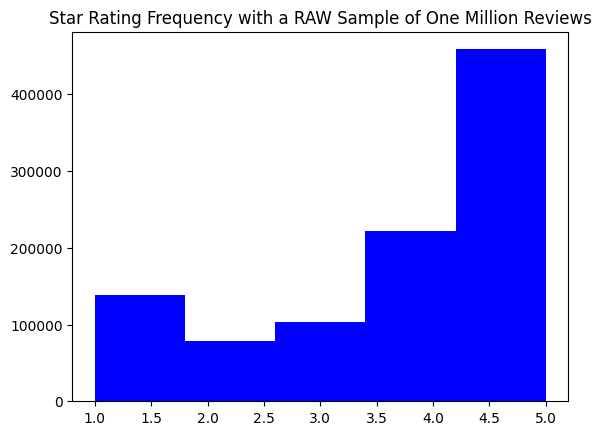

In [49]:
graph_star_freq_raw = plt.hist(yelp_sample_unequal_mil['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a RAW Sample of One Million Reviews')

Text(0.5, 1.0, 'Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

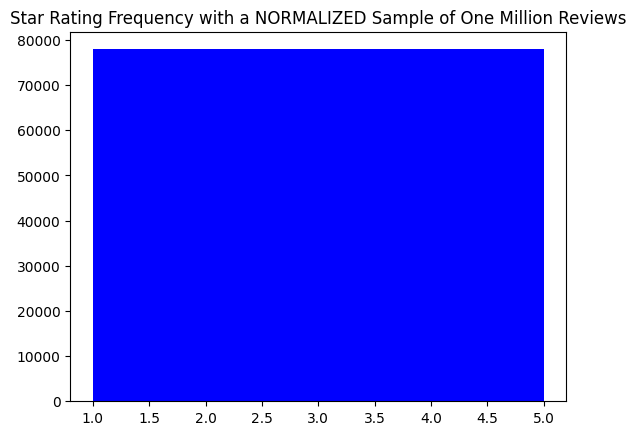

In [50]:
graph_star_freq_normal = plt.hist(yelp_sample_equal_mil['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

We want to note here that our sample dataset is biased to more positive reviews than negative reviews. As a result, we should proceed with caution when classifying, training, and predicting with this dataset.

### 4 Classify reviews into different star classes and separate the dataset into X and Y subsets for prediction:

#### a.i.i. 10,000 equal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [8]:
yelp_classify = yelp_sample_equal_ten_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_ten_thou_five_equal = yelp_classify['text']
y_ten_thou_five_equal = yelp_classify['stars']

print()
print("A few X entries")
print(x_ten_thou_five_equal)

print()
print("A few Y entries")
print(y_ten_thou_five_equal)


Shape of the dataset: (3815, 2)

A few X entries
stars      
1.0    5       I am a long term frequent customer of this est...
       47      If you want to pay for everything a la carte t...
       64      The TV shows are $4.99 and they have commercia...
       73      If I could give it a zero, I would. I order a ...
       79      We visited once and were very disappointed in ...
                                     ...                        
5.0    1661    This little unassuming shop is tucked away in ...
       1662    Great food and good coffee. Wish they had more...
       1663    holly grove is the best. I'm consistently impr...
       1669    Henry was a rock star  getting us into a stora...
       1670    Phenomenal restaurant. Great location. Great a...
Name: text, Length: 3815, dtype: object

A few Y entries
stars      
1.0    5       1.0
       47      1.0
       64      1.0
       73      1.0
       79      1.0
              ... 
5.0    1661    5.0
       1662    5.0
  

#### a.i.ii. 10,000 unequal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [9]:
yelp_classify = yelp_sample_unequal_ten_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_ten_thou_five_unequal = yelp_classify['text']
y_ten_thou_five_unequal = yelp_classify['stars']

print()
print("A few X entries")
print(x_ten_thou_five_unequal)

print()
print("A few Y entries")
print(y_ten_thou_five_unequal)


Shape of the dataset: (10000, 2)

A few X entries
0       If you decide to eat here, just be aware it is...
1       I've taken a lot of spin classes over the year...
2       Family diner. Had the buffet. Eclectic assortm...
3       Wow!  Yummy, different,  delicious.   Our favo...
4       Cute interior and owner (?) gave us tour of up...
                              ...                        
9995    Excellent food and service. The place is funct...
9996    Just about to get tucked into a meatloaf that ...
9997    Outstanding customer service! And my car is dr...
9998    I and my husband went here for Dinner one day ...
9999    I saw Big Data when they came to town at the K...
Name: text, Length: 10000, dtype: object

A few Y entries
0       3.0
1       5.0
2       3.0
3       5.0
4       4.0
       ... 
9995    5.0
9996    5.0
9997    5.0
9998    5.0
9999    2.0
Name: stars, Length: 10000, dtype: float64


#### a.ii.i. 10,000 equal reviews into 1-star (negative) and 5-star (positive) classes:

In [10]:
yelp_classify = yelp_sample_equal_ten_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_ten_thou_two_equal = data_classes['text']
y_ten_thou_two_equal = data_classes['stars']


Shape of the dataset: (1526, 2)


#### a.ii.ii. 10,000 unequal reviews into 1-star (negative) and 5-star (positive) classes:

In [11]:
yelp_classify = yelp_sample_unequal_ten_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_ten_thou_two_unequal = data_classes['text']
y_ten_thou_two_unequal = data_classes['stars']


Shape of the dataset: (5524, 2)


#### a.iii.i. 10,000 equal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [12]:
yelp_classify = yelp_sample_equal_ten_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_ten_thou_three_equal = data_classes['text']
y_ten_thou_three_equal = data_classes['stars']


Shape of the dataset: (2289, 2)


#### a.iii.ii. 10,000 unequal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [13]:
yelp_classify = yelp_sample_unequal_ten_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_ten_thou_three_unequal = data_classes['text']
y_ten_thou_three_unequal = data_classes['stars']


Shape of the dataset: (6663, 2)


#### b.i.i. 100,000 equal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [57]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_hund_thou_five_equal = yelp_classify['text']
y_hund_thou_five_equal = yelp_classify['stars']


Shape of the dataset: (39940, 2)


#### b.i.ii. 100,000 unequal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [58]:
yelp_classify = yelp_sample_unequal_hund_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_hund_thou_five_unequal = yelp_classify['text']
y_hund_thou_five_unequal = yelp_classify['stars']


Shape of the dataset: (100000, 2)


#### b.ii.i. 100,000 equal reviews into 1-star (negative) and 5-star (positive) classes:

In [59]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_two_equal = data_classes['text']
y_hund_thou_two_equal = data_classes['stars']


Shape of the dataset: (15976, 2)


#### b.ii.ii. 100,000 unequal reviews into 1-star (negative) and 5-star (positive) classes:

In [60]:
yelp_classify = yelp_sample_unequal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_two_unequal = data_classes['text']
y_hund_thou_two_unequal = data_classes['stars']


Shape of the dataset: (55313, 2)


#### b.iii.i. 100,000 equal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [61]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_three_equal = data_classes['text']
y_hund_thou_three_equal = data_classes['stars']


Shape of the dataset: (23964, 2)


#### b.iii.ii. 100,000 unequal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [62]:
yelp_classify = yelp_sample_unequal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_three_unequal = data_classes['text']
y_hund_thou_three_unequal = data_classes['stars']


Shape of the dataset: (66675, 2)


#### c.i.i. Classify 1,000,000 equal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [63]:
yelp_classify = yelp_sample_equal_mil.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_mil_five_equal = data_classes['text']
y_mil_five_equal = data_classes['stars']


Shape of the dataset: (389560, 2)


#### c.i.ii. 1,000,000 unequal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [64]:
yelp_classify = yelp_sample_unequal_mil.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_mil_five_unequal = data_classes['text']
y_mil_five_unequal = data_classes['stars']


Shape of the dataset: (1000000, 2)


#### c.ii.i. 1,000,000 equal reviews into 1-star (negative) and 5-star (positive) classes:

In [65]:
yelp_classify = yelp_sample_equal_mil.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_mil_two_equal = data_classes['text']
y_mil_two_equal = data_classes['stars']


Shape of the dataset: (155824, 2)


#### c.ii.ii. 1,000,000 unequal reviews into 1-star (negative) and 5-star (positive) classes:

In [66]:
yelp_classify = yelp_sample_unequal_mil.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_mil_two_unequal = data_classes['text']
y_mil_two_unequal = data_classes['stars']


Shape of the dataset: (597237, 2)


#### c.iii.i. 1,000,000 equal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [67]:
yelp_classify = yelp_sample_equal_mil.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_mil_three_equal = data_classes['text']
y_mil_three_equal = data_classes['stars']


Shape of the dataset: (233736, 2)


#### c.iii.ii. 1,000,000 unequal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [68]:
yelp_classify = yelp_sample_unequal_mil.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_mil_three_unequal = data_classes['text']
y_mil_three_unequal = data_classes['stars']


Shape of the dataset: (700191, 2)


### 5. Clean the review text by removing stopwords and punctuation:

In [15]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### 6. Vectorize reviews and split processed dataset into training and testing sets:

#### a.i.i. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [16]:
vocab_ten_thou_five_equal = (CountVectorizer(analyzer=process_text)
                             .fit(x_ten_thou_five_equal))
r1 = x_ten_thou_five_equal[1][5]
vocab1 = vocab_ten_thou_five_equal.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_five_equal.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", 
      vocab_ten_thou_five_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_ten_thou_five_equal.get_feature_names_out()[10000])

x_ten_thou_five_equal = vocab_ten_thou_five_equal.transform(x_ten_thou_five_equal)
(x_train_ten_thou_five_equal, 
 x_test_ten_thou_five_equal, 
 y_train_ten_thou_five_equal, 
 y_test_ten_thou_five_equal) = train_test_split(x_ten_thou_five_equal, 
                                                y_ten_thou_five_equal, 
                                                test_size=0.2, 
                                                random_state=101)

print(x_train_ten_thou_five_equal)
print(y_train_ten_thou_five_equal)


Number of possible words: 21208

Sample Uncleaned Review:
I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!

Vectorized Review:
  (0, 322)	1
  (0, 2833)	1
  (0, 2846)	1
  (0, 3245)	1
  (0, 3472)	1
  (0, 4223)	1
  (0, 5051)	1
  (0, 6645)	1
  (0, 7244)	1
  (0, 7332)	1
  (0, 7510)	1
  (0, 7814)	1
  (0, 8377)	1
  (0, 9848)	2
  (0, 10232)	1
  (0, 10459)	1
  (0, 11027)	1
  (0, 11818)	2
  (0, 11890)	1
  (0, 11900)	1
  (0, 12126)	1
  (0, 12236)	1
  (0, 12414)	1
  (0, 13983)	1
  (0, 14304)	1
  (0, 15318)	1
  (0, 15361)	1
  (0, 16024)	1
  (0, 16800)	1
  (0, 19342)	1
  (0, 19512)	1
  (0, 19578)	1
  (0, 19725)	1
  (0, 19770)	1
  (0, 20819)	1

Return word from index 5000: Rabbit
Return word from index 20000: de

#### a.i.ii. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [91]:
vocab_ten_thou_five_unequal = (CountVectorizer(analyzer=process_text)
                               .fit(x_ten_thou_five_unequal))
r1 = x_ten_thou_five_unequal[1][5]
vocab1 = vocab_ten_thou_five_unequal.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_five_unequal.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", 
      vocab_ten_thou_five_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_ten_thou_five_unequal.get_feature_names_out()[10000])

x_ten_thou_five_unequal = vocab_ten_thou_five_unequal.transform(x_ten_thou_five_unequal)
(x_train,
 y_train) = train_test_split(x_ten_thou_five_unequal, 
                                                  y_ten_thou_five_unequal, 
                                                  test_size=0.2, 
                                                  random_state=101)


Number of possible words: 35071

Sample Uncleaned Review:
t

Vectorized Review:


Return word from index 5000: GOOOD
Return word from index 20000: Screaming


#### a.ii.i. 10,000 (1-star and 5-star) equal reviews:

In [72]:
vocab_ten_thou_two_equal = (CountVectorizer(analyzer=process_text)
                            .fit(x_ten_thou_two_equal))
r1 = x_ten_thou_two_equal[1][5]
vocab1 = vocab_ten_thou_two_equal.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_two_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_ten_thou_two_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_ten_thou_two_equal.get_feature_names_out()[10000])

x_ten_thou_two_equal = vocab_ten_thou_two_equal.transform(x_ten_thou_two_equal)
(x_train_ten_thou_two_equal, 
 x_test_ten_thou_two_equal, 
 y_train_ten_thou_two_equal, 
 y_test_ten_thou_two_equal) = train_test_split(x_ten_thou_two_equal, 
                                               y_ten_thou_two_equal, 
                                               test_size=0.2, 
                                               random_state=101)


Number of possible words: 12741

Return word from index 5000: chefas
Return word from index 20000: recommend


#### a.ii.ii. 10,000 (1-star and 5-star) unequal reviews:

In [73]:
vocab_ten_thou_two_unequal = (CountVectorizer(analyzer=process_text)
                              .fit(x_ten_thou_two_unequal))
r1 = x_ten_thou_two_unequal[1][5]
vocab1 = vocab_ten_thou_two_unequal.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_two_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_ten_thou_two_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_ten_thou_two_unequal.get_feature_names_out()[10000])

x_ten_thou_two_unequal = vocab_ten_thou_two_unequal.transform(x_ten_thou_two_unequal)
(x_train_ten_thou_two_unequal, 
 x_test_ten_thou_two_unequal, 
 y_train_ten_thou_two_unequal, 
 y_test_ten_thou_two_unequal) = train_test_split(x_ten_thou_two_unequal, 
                                                 y_ten_thou_two_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)


Number of possible words: 24817

Return word from index 5000: Mary
Return word from index 20000: boon


#### 6.a.iii.i. 10,000 (1-star, 3-star, and 5-star) equal reviews:

In [74]:
vocab_ten_thou_three_equal = (CountVectorizer(analyzer=process_text)
                              .fit(x_ten_thou_three_equal))

print()
print("Number of possible words:", len(vocab_ten_thou_three_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_ten_thou_three_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_ten_thou_three_equal.get_feature_names_out()[10000])

x_ten_thou_three_equal = vocab_ten_thou_three_equal.transform(x_ten_thou_three_equal)
(x_train_ten_thou_three_equal, 
 x_test_ten_thou_three_equal, 
 y_train_ten_thou_three_equal, 
 y_test_ten_thou_three_equal) = train_test_split(x_ten_thou_three_equal, 
                                                 y_ten_thou_three_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)


Number of possible words: 15946

Return word from index 5000: alert
Return word from index 20000: jaded


#### a.iii.ii. 10,000 (1-star, 3-star, and 5-star) unequal reviews:

In [75]:
vocab_ten_thou_three_unequal = (CountVectorizer(analyzer=process_text)
                                .fit(x_ten_thou_three_unequal))

print()
print("Number of possible words:", len(vocab_ten_thou_three_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_ten_thou_three_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_ten_thou_three_unequal.get_feature_names_out()[10000])

x_ten_thou_three_unequal = vocab_ten_thou_three_unequal.transform(x_ten_thou_three_unequal)
(x_train_ten_thou_three_unequal, 
 x_test_ten_thou_three_unequal, 
 y_train_ten_thou_three_unequal, 
 y_test_ten_thou_three_unequal) = train_test_split(x_ten_thou_three_unequal, 
                                                   y_ten_thou_three_unequal, 
                                                   test_size=0.2, 
                                                   random_state=101)


Number of possible words: 27678

Return word from index 5000: KitchenAid
Return word from index 20000: amway


#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [76]:
vocab_hund_thou_five_equal = (CountVectorizer(analyzer=process_text)
                              .fit(x_hund_thou_five_equal))

print()
print("Number of possible words:", len(vocab_hund_thou_five_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_hund_thou_five_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_hund_thou_five_equal.get_feature_names_out()[20000])

x_hund_thou_five_equal = vocab_hund_thou_five_equal.transform(x_hund_thou_five_equal)
(x_train_hund_thou_five_equal, 
 x_test_hund_thou_five_equal, 
 y_train_hund_thou_five_equal, 
 y_test_hund_thou_five_equal) = train_test_split(x_hund_thou_five_equal, 
                                                 y_hund_thou_five_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)


Number of possible words: 76896

Return word from index 5000: Bellied
Return word from index 20000: Philly


#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [77]:
vocab_hund_thou_five_unequal = (CountVectorizer(analyzer=process_text)
                                .fit(x_hund_thou_five_unequal))

print()
print("Number of possible words:", len(vocab_hund_thou_five_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_hund_thou_five_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_hund_thou_five_unequal.get_feature_names_out()[20000])

x_hund_thou_five_unequal = vocab_hund_thou_five_unequal.transform(x_hund_thou_five_unequal)
(x_train_hund_thou_five_unequal, 
 x_test_hund_thou_five_unequal, 
 y_train_hund_thou_five_unequal, 
 y_test_hund_thou_five_unequal) = train_test_split(x_hund_thou_five_unequal, 
                                                   y_hund_thou_five_unequal, 
                                                   test_size=0.2, 
                                                   random_state=101)


Number of possible words: 125033

Return word from index 5000: Addendum
Return word from index 20000: Gone


#### b.ii.i. 100,000 (1-star and 5-star) equal reviews:

In [78]:
vocab_hund_thou_two_equal = (CountVectorizer(analyzer=process_text)
                             .fit(x_hund_thou_two_equal))

print()
print("Number of possible words:", len(vocab_hund_thou_two_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_hund_thou_two_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_hund_thou_two_equal.get_feature_names_out()[20000])

x_hund_thou_two_equal = vocab_hund_thou_two_equal.transform(x_hund_thou_two_equal)
(x_train_hund_thou_two_equal, 
 x_test_hund_thou_two_equal, 
 y_train_hund_thou_two_equal, 
 y_test_hund_thou_two_equal) = train_test_split(x_hund_thou_two_equal, 
                                                y_hund_thou_two_equal, 
                                                test_size=0.2, 
                                                random_state=101)


Number of possible words: 45501

Return word from index 5000: Curious
Return word from index 20000: buggy


#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [79]:
vocab_hund_thou_two_unequal = (CountVectorizer(analyzer=process_text)
                               .fit(x_hund_thou_two_unequal))

print()
print("Number of possible words:", len(vocab_hund_thou_two_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_hund_thou_two_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_hund_thou_two_unequal.get_feature_names_out()[20000])

x_hund_thou_two_unequal = vocab_hund_thou_two_unequal.transform(x_hund_thou_two_unequal)
(x_train_hund_thou_two_unequal, 
 x_test_hund_thou_two_unequal,
 y_train_hund_thou_two_unequal, 
 y_test_hund_thou_two_unequal) = train_test_split(x_hund_thou_two_unequal, 
                                                  y_hund_thou_two_unequal, 
                                                  test_size=0.2, 
                                                  random_state=101)


Number of possible words: 86109

Return word from index 5000: BRC
Return word from index 20000: Marquees


#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [80]:
vocab_hund_thou_three_equal = (CountVectorizer(analyzer=process_text)
                               .fit(x_hund_thou_three_equal))

print()
print("Number of possible words:", len(vocab_hund_thou_three_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_hund_thou_three_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_hund_thou_three_equal.get_feature_names_out()[20000])

x_hund_thou_three_equal = vocab_hund_thou_three_equal.transform(x_hund_thou_three_equal)
(x_train_hund_thou_three_equal, 
 x_test_hund_thou_three_equal, 
 y_train_hund_thou_three_equal, 
 y_test_hund_thou_three_equal) = train_test_split(x_hund_thou_three_equal, 
                                                  y_hund_thou_three_equal, 
                                                  test_size=0.2, 
                                                  random_state=101)


Number of possible words: 57720

Return word from index 5000: Cappuccino
Return word from index 20000: Venison


#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [81]:
vocab_hund_thou_three_unequal = (CountVectorizer(analyzer=process_text)
                                 .fit(x_hund_thou_three_unequal))

print()
print("Number of possible words:", len(vocab_hund_thou_three_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_hund_thou_three_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_hund_thou_three_unequal.get_feature_names_out()[20000])

x_hund_thou_three_unequal = vocab_hund_thou_three_unequal.transform(x_hund_thou_three_unequal)
(x_train_hund_thou_three_unequal, 
 x_test_hund_thou_three_unequal, 
 y_train_hund_thou_three_unequal, 
 y_test_hund_thou_three_unequal) = train_test_split(x_hund_thou_three_unequal, 
                                                    y_hund_thou_three_unequal, 
                                                    test_size=0.2, 
                                                    random_state=101)


Number of possible words: 97469

Return word from index 5000: Ash
Return word from index 20000: Kumas


#### c.i.i. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [82]:
vocab_mil_five_equal = (CountVectorizer(analyzer=process_text)
                        .fit(x_mil_five_equal))

print()
print("Number of possible words:", len(vocab_mil_five_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_mil_five_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_mil_five_equal.get_feature_names_out()[20000])

x_mil_five_equal = vocab_mil_five_equal.transform(x_mil_five_equal)
(x_train_mil_five_equal, 
 x_test_mil_five_equal, 
 y_train_mil_five_equal, 
 y_test_mil_five_equal) = train_test_split(x_mil_five_equal, 
                                           y_mil_five_equal, 
                                           test_size=0.2, 
                                           random_state=101)


Number of possible words: 97469

Return word from index 5000: Ash
Return word from index 20000: Kumas


#### c.i.ii. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [83]:
vocab_mil_five_unequal = (CountVectorizer(analyzer=process_text)
                          .fit(x_mil_five_unequal))

print()
print("Number of possible words:", len(vocab_mil_five_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_mil_five_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_mil_five_unequal.get_feature_names_out()[20000])

x_mil_five_unequal = vocab_mil_five_unequal.transform(x_mil_five_unequal)
(x_train_mil_five_unequal, 
 x_test_mil_five_unequal, 
 y_train_mil_five_unequal, 
 y_test_mil_five_unequal) = train_test_split(x_mil_five_unequal, 
                                             y_mil_five_unequal, 
                                             test_size=0.2, 
                                             random_state=101)


Number of possible words: 97469

Return word from index 5000: Ash
Return word from index 20000: Kumas


#### c.ii.i. 1,000,000 (1-star and 5-star) equal reviews:

In [84]:
vocab_mil_two_equal = (CountVectorizer(analyzer=process_text)
                       .fit(x_mil_two_equal))

print()
print("Number of possible words:", len(vocab_mil_two_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_mil_two_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_mil_two_equal.get_feature_names_out()[20000])

x_mil_two_equal = vocab_mil_two_equal.transform(x_mil_two_equal)
(x_train_mil_two_equal, 
 x_test_mil_two_equal, 
 y_train_mil_two_equal, 
 y_test_mil_two_equal) = train_test_split(x_mil_two_equal, 
                                          y_mil_two_equal, 
                                          test_size=0.2, 
                                          random_state=101)


Number of possible words: 167844

Return word from index 5000: 40400
Return word from index 20000: Competitive


#### c.ii.ii. 1,000,000 (1-star and 5-star) unequal reviews:

In [85]:
vocab_mil_two_unequal = (CountVectorizer(analyzer=process_text)
                         .fit(x_mil_two_unequal))

print()
print("Number of possible words:", len(vocab_mil_two_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_mil_two_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_mil_two_unequal.get_feature_names_out()[20000])

x_mil_two_unequal = vocab_mil_two_unequal.transform(x_mil_two_unequal)
(x_train_mil_two_unequal, 
 x_test_mil_two_unequal, 
 y_train_mil_two_unequal, 
 y_test_mil_two_unequal) = train_test_split(x_mil_two_unequal, 
                                            y_mil_two_unequal, 
                                            test_size=0.2, 
                                            random_state=101)


Number of possible words: 363038

Return word from index 5000: 19127
Return word from index 20000: Albin


#### c.iii.i. 1,000,000 (1-star, 3-star, and 5-star) equal reviews:

In [86]:
vocab_mil_three_equal = (CountVectorizer(analyzer=process_text)
                         .fit(x_mil_three_equal))

print()
print("Number of possible words:", len(vocab_mil_three_equal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_mil_three_equal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_mil_three_equal.get_feature_names_out()[20000])

x_mil_three_equal = vocab_mil_three_equal.transform(x_mil_three_equal)
(x_train_mil_three_equal, 
 x_test_mil_three_equal, 
 y_train_mil_three_equal, 
 y_test_mil_three_equal) = train_test_split(x_mil_three_equal, 
                                            y_mil_three_equal, 
                                            test_size=0.2, 
                                            random_state=101)


Number of possible words: 218502

Return word from index 5000: 2pcs
Return word from index 20000: Bus


#### c.iii.ii. 1,000,000 (1-star, 3-star, and 5-star) unequal reviews:

In [87]:
vocab_mil_three_unequal = (CountVectorizer(analyzer=process_text)
                           .fit(x_mil_three_unequal))

print()
print("Number of possible words:", len(vocab_mil_three_unequal.vocabulary_))

print()
print("Return word from index 5000:", 
      vocab_mil_three_unequal.get_feature_names_out()[5000])
print("Return word from index 20000:", 
      vocab_mil_three_unequal.get_feature_names_out()[20000])

x_mil_three_unequal = vocab_mil_three_unequal.transform(x_mil_three_unequal)
(x_train_mil_three_unequal, 
 x_test_mil_three_unequal, 
 y_train_mil_three_unequal, 
 y_test_mil_three_unequal) = train_test_split(x_mil_three_unequal, 
                                              y_mil_three_unequal, 
                                              test_size=0.2, 
                                              random_state=101)


Number of possible words: 410337

Return word from index 5000: 1755
Return word from index 20000: APORKALYPSE


### 7. Modeling reviews with Multinomial Naive Bayes (since we're working with sparse data, we cannot rely on the Gaussian Naive Bayes assumptions)

#### a.i.i. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [88]:
from sklearn.naive_bayes import MultinomialNB
mnb_ten_5 = MultinomialNB()
mnb_ten_5.fit(x_train_ten_thou_five_equal, y_train_ten_thou_five_equal)
predmnb = mnb_ten_5.predict(x_test_ten_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_five_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five_equal, predmnb))


Score: 47.05

Classification Report:
              precision    recall  f1-score   support

         1.0       0.59      0.68      0.63       145
         2.0       0.43      0.39      0.41       163
         3.0       0.37      0.48      0.42       149
         4.0       0.41      0.47      0.44       156
         5.0       0.70      0.34      0.46       150

    accuracy                           0.47       763
   macro avg       0.50      0.47      0.47       763
weighted avg       0.50      0.47      0.47       763



#### a.i.ii. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [94]:
mnb_ten_5 = MultinomialNB()
mnb_ten_5.fit(x_train_ten_thou_five_unequal, y_train_ten_thou_five_unequal)
predmnb = mnb_ten_5.predict(x_test_ten_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_five_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five_unequal, predmnb))


Score: 53.16

Classification Report:
              precision    recall  f1-score   support

         1.0       0.64      0.66      0.65       213
         2.0       0.13      0.01      0.02       152
         3.0       0.34      0.09      0.15       213
         4.0       0.42      0.50      0.46       546
         5.0       0.67      0.81      0.73       876

    accuracy                           0.57      2000
   macro avg       0.44      0.41      0.40      2000
weighted avg       0.52      0.57      0.53      2000



#### a.ii.i. 10,000 (1-star and 5-star) equal reviews:

In [98]:
mnb_ten_2 = MultinomialNB()
mnb_ten_2.fit(x_train_ten_thou_two_equal, y_train_ten_thou_two_equal)
predmnb = mnb_ten_2.predict(x_test_ten_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_two_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two_equal, predmnb))


Score: 90.52

Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.90      0.91       156
         5.0       0.90      0.91      0.90       150

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306



#### a.ii.ii. 10,000 (1-star and 5-star) unequal reviews:

In [97]:
mnb_ten_2 = MultinomialNB()
mnb_ten_2.fit(x_train_ten_thou_two_unequal, y_train_ten_thou_two_unequal)
predmnb = mnb_ten_2.predict(x_test_ten_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_two_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two_unequal, predmnb))


Score: 93.92

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.84      0.85       225
         5.0       0.96      0.96      0.96       880

    accuracy                           0.94      1105
   macro avg       0.91      0.90      0.91      1105
weighted avg       0.94      0.94      0.94      1105



#### a.iii.i. 10,000 (1-star, 3-star, and 5-star) equal reviews:

In [99]:
mnb_ten_3 = MultinomialNB()
mnb_ten_3.fit(x_train_ten_thou_three_equal, y_train_ten_thou_three_equal)
predmnb = mnb_ten_3.predict(x_test_ten_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_three_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three_equal, predmnb))


Score: 74.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79       153
         3.0       0.67      0.75      0.70       166
         5.0       0.83      0.68      0.75       139

    accuracy                           0.75       458
   macro avg       0.76      0.74      0.75       458
weighted avg       0.75      0.75      0.75       458



#### a.iii.ii. 10,000 (1-star, 3-star, and 5-star) unequal reviews:

In [100]:
mnb_ten_3 = MultinomialNB()
mnb_ten_3.fit(x_train_ten_thou_three_unequal, y_train_ten_thou_three_unequal)
predmnb = mnb_ten_3.predict(x_test_ten_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_three_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three_unequal, predmnb))


Score: 79.6

Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.70      0.72       202
         3.0       0.60      0.36      0.45       227
         5.0       0.86      0.95      0.90       904

    accuracy                           0.81      1333
   macro avg       0.73      0.67      0.69      1333
weighted avg       0.79      0.81      0.80      1333



#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [101]:
mnb_hund_5 = MultinomialNB()
mnb_hund_5.fit(x_train_hund_thou_five_equal, y_train_hund_thou_five_equal)
predmnb = mnb_hund_5.predict(x_test_hund_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_equal, predmnb))


Score: 52.77

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.67      0.65      1626
         2.0       0.45      0.46      0.46      1584
         3.0       0.44      0.47      0.46      1650
         4.0       0.47      0.50      0.48      1596
         5.0       0.68      0.54      0.60      1532

    accuracy                           0.53      7988
   macro avg       0.54      0.53      0.53      7988
weighted avg       0.54      0.53      0.53      7988



#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [102]:
mnb_hund_5 = MultinomialNB()
mnb_hund_5.fit(x_train_hund_thou_five_unequal, y_train_hund_thou_five_unequal)
predmnb = mnb_hund_5.predict(x_test_hund_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_five_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_unequal, predmnb))


Score: 58.27

Classification Report:
              precision    recall  f1-score   support

         1.0       0.60      0.72      0.66      2168
         2.0       0.39      0.15      0.21      1566
         3.0       0.39      0.21      0.27      2339
         4.0       0.45      0.56      0.50      5026
         5.0       0.74      0.78      0.76      8901

    accuracy                           0.60     20000
   macro avg       0.52      0.48      0.48     20000
weighted avg       0.59      0.60      0.58     20000



#### b.ii.i. Modeling 100,000 (1-star and 5-star) equal reviews:

In [103]:
mnb_hund_2 = MultinomialNB()
mnb_hund_2.fit(x_train_hund_thou_two_equal, y_train_hund_thou_two_equal)
predmnb = mnb_hund_2.predict(x_test_hund_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_equal, predmnb))


Score: 94.9

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1604
         5.0       0.95      0.94      0.95      1592

    accuracy                           0.95      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.95      0.95      0.95      3196



#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [104]:
mnb_hund_2 = MultinomialNB()
mnb_hund_2.fit(x_train_hund_thou_two_unequal, y_train_hund_thou_two_unequal)
predmnb = mnb_hund_2.predict(x_test_hund_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_two_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_unequal, predmnb))


Score: 95.02

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.89      0.88      2207
         5.0       0.97      0.96      0.97      8856

    accuracy                           0.95     11063
   macro avg       0.92      0.93      0.92     11063
weighted avg       0.95      0.95      0.95     11063



#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [105]:
mnb_hund_3 = MultinomialNB()
mnb_hund_3.fit(x_train_hund_thou_three_equal, y_train_hund_thou_three_equal)
predmnb = mnb_hund_3.predict(x_test_hund_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_equal, predmnb))


Score: 78.24

Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.80      0.81      1640
         3.0       0.68      0.78      0.73      1604
         5.0       0.87      0.77      0.81      1549

    accuracy                           0.78      4793
   macro avg       0.79      0.78      0.78      4793
weighted avg       0.79      0.78      0.78      4793



#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [106]:
mnb_hund_3 = MultinomialNB()
mnb_hund_3.fit(x_train_hund_thou_three_unequal, y_train_hund_thou_three_unequal)
predmnb = mnb_hund_3.predict(x_test_hund_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_three_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_unequal, predmnb))


Score: 85.12

Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.78      0.77      2231
         3.0       0.66      0.62      0.64      2272
         5.0       0.92      0.93      0.92      8832

    accuracy                           0.85     13335
   macro avg       0.78      0.78      0.78     13335
weighted avg       0.85      0.85      0.85     13335



#### c.i.i. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [107]:
mnb_mil_5 = MultinomialNB()
mnb_mil_5.fit(x_train_mil_five_equal, y_train_mil_five_equal)
predmnb = mnb_mil_5.predict(x_test_mil_five_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_five_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five_equal, predmnb))


Score: 85.25

Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.78      0.77      2231
         3.0       0.66      0.62      0.64      2272
         5.0       0.92      0.93      0.92      8832

    accuracy                           0.85     13335
   macro avg       0.78      0.78      0.78     13335
weighted avg       0.85      0.85      0.85     13335



#### c.i.ii. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [108]:
mnb_mil_5 = MultinomialNB()
mnb_mil_5.fit(x_train_mil_five_unequal, y_train_mil_five_unequal)
predmnb = mnb_mil_5.predict(x_test_mil_five_unequal)

print()
print("Score:", round(f1_score(y_test_mil_five_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five_unequal, predmnb))


Score: 85.12

Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.78      0.77      2231
         3.0       0.66      0.62      0.64      2272
         5.0       0.92      0.93      0.92      8832

    accuracy                           0.85     13335
   macro avg       0.78      0.78      0.78     13335
weighted avg       0.85      0.85      0.85     13335



#### c.ii.i. 1,000,000 (1-star and 5-star) equal reviews:

In [110]:
mnb_mil_2 = MultinomialNB()
mnb_mil_2.fit(x_train_mil_two_equal, y_train_mil_two_equal)
predmnb = mnb_mil_2.predict(x_test_mil_two_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_two_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two_equal, predmnb))


Score: 93.54

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.93     15574
         5.0       0.93      0.94      0.94     15591

    accuracy                           0.94     31165
   macro avg       0.94      0.94      0.94     31165
weighted avg       0.94      0.94      0.94     31165



#### c.ii.ii. 1,000,000 (1-star and 5-star) unequal reviews:

In [111]:
mnb_mil_2 = MultinomialNB()
mnb_mil_2.fit(x_train_mil_two_unequal, y_train_mil_two_unequal)
predmnb = mnb_mil_2.predict(x_test_mil_two_unequal)

print()
print("Score:", round(f1_score(y_test_mil_two_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two_unequal, predmnb))


Score: 94.27

Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.91      0.88     27667
         5.0       0.97      0.95      0.96     91781

    accuracy                           0.94    119448
   macro avg       0.91      0.93      0.92    119448
weighted avg       0.94      0.94      0.94    119448



#### c.iii.i. 1,000,000 (1-star, 3-star, and 5-star) equal reviews:

In [112]:
mnb_mil_3= MultinomialNB()
mnb_mil_3.fit(x_train_mil_three_equal, y_train_mil_three_equal)
predmnb = mnb_mil_3.predict(x_test_mil_three_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_three_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three_equal, predmnb))


Score: 79.66

Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.78      0.80     15566
         3.0       0.70      0.78      0.74     15502
         5.0       0.89      0.83      0.86     15680

    accuracy                           0.80     46748
   macro avg       0.80      0.80      0.80     46748
weighted avg       0.80      0.80      0.80     46748



#### c.iii.ii. 1,000,000 (1-star, 3-star, and 5-star) unequal reviews:

In [113]:
mnb_mil_3= MultinomialNB()
mnb_mil_3.fit(x_train_mil_three_unequal, y_train_mil_three_unequal)
predmnb = mnb_mil_3.predict(x_test_mil_three_unequal)

print()
print("Score:", round(f1_score(y_test_mil_three_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three_unequal, predmnb))


Score: 85.45

Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.80      0.78     27751
         3.0       0.60      0.68      0.64     20519
         5.0       0.95      0.90      0.92     91769

    accuracy                           0.85    140039
   macro avg       0.77      0.80      0.78    140039
weighted avg       0.86      0.85      0.85    140039



### 9. Modeling reviews with Random Forest Classifier:

#### a.i.i. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [114]:
from sklearn.ensemble import RandomForestClassifier
rmfr_ten_5 = RandomForestClassifier()
rmfr_ten_5.fit(x_train_ten_thou_five_equal, y_train_ten_thou_five_equal)
predrmfr = rmfr_ten_5.predict(x_test_ten_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_five_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five_equal, predrmfr))


Score: 44.17

Classification Report:
              precision    recall  f1-score   support

         1.0       0.48      0.68      0.56       145
         2.0       0.40      0.21      0.27       163
         3.0       0.36      0.40      0.38       149
         4.0       0.45      0.28      0.34       156
         5.0       0.48      0.68      0.57       150

    accuracy                           0.44       763
   macro avg       0.43      0.45      0.42       763
weighted avg       0.43      0.44      0.42       763



#### a.i.ii. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [115]:
rmfr_ten_5 = RandomForestClassifier()
rmfr_ten_5.fit(x_train_ten_thou_five_unequal, y_train_ten_thou_five_unequal)
predrmfr = rmfr_ten_5.predict(x_test_ten_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_five_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five_unequal, predrmfr))


Score: 44.13

Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.49      0.58       213
         2.0       0.40      0.01      0.03       152
         3.0       0.47      0.04      0.07       213
         4.0       0.40      0.20      0.27       546
         5.0       0.53      0.94      0.68       876

    accuracy                           0.52      2000
   macro avg       0.50      0.34      0.32      2000
weighted avg       0.50      0.52      0.44      2000



#### a.ii.i. 10,000 (1-star and 5-star) equal reviews:

In [116]:
rmfr_ten_2 = RandomForestClassifier()
rmfr_ten_2.fit(x_train_ten_thou_two_equal, y_train_ten_thou_two_equal)
predrmfr = rmfr_ten_2.predict(x_test_ten_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_two_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two_equal, predrmfr))


Score: 90.2

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.90      0.90       156
         5.0       0.89      0.91      0.90       150

    accuracy                           0.90       306
   macro avg       0.90      0.90      0.90       306
weighted avg       0.90      0.90      0.90       306



#### a.ii.ii. 10,000 (1-star and 5-star) unequal reviews:

In [117]:
rmfr_ten_2 = RandomForestClassifier()
rmfr_ten_2.fit(x_train_ten_thou_two_unequal, y_train_ten_thou_two_unequal)
predrmfr = rmfr_ten_2.predict(x_test_ten_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_two_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two_unequal, predrmfr))


Score: 86.93

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.46      0.62       225
         5.0       0.88      1.00      0.93       880

    accuracy                           0.89      1105
   macro avg       0.92      0.73      0.78      1105
weighted avg       0.90      0.89      0.87      1105



#### a.iii.i. Modeling 10,000 (1-star, 3-star, and 5-star) equal reviews:

In [118]:
rmfr_ten_3 = RandomForestClassifier()
rmfr_ten_3.fit(x_train_ten_thou_three_equal, y_train_ten_thou_three_equal)
predrmfr = rmfr_ten_3.predict(x_test_ten_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_three_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three_equal, predrmfr))


Score: 70.52

Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.88      0.79       153
         3.0       0.74      0.50      0.60       166
         5.0       0.67      0.76      0.71       139

    accuracy                           0.71       458
   macro avg       0.71      0.71      0.70       458
weighted avg       0.71      0.71      0.70       458



#### a.iii.ii. 10,000 (1-star, 3-star, and 5-star) unequal reviews:

In [119]:
rmfr_ten_3 = RandomForestClassifier()
rmfr_ten_3.fit(x_train_ten_thou_three_unequal, y_train_ten_thou_three_unequal)
predrmfr = rmfr_ten_3.predict(x_test_ten_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_three_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three_unequal, predrmfr))


Score: 72.18

Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.50      0.64       202
         3.0       0.74      0.14      0.24       227
         5.0       0.76      0.99      0.86       904

    accuracy                           0.77      1333
   macro avg       0.80      0.55      0.58      1333
weighted avg       0.78      0.77      0.72      1333



#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [120]:
rmfr_hund_5 = RandomForestClassifier()
rmfr_hund_5.fit(x_train_hund_thou_five_equal, y_train_hund_thou_five_equal)
predrmfr = rmfr_hund_5.predict(x_test_hund_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_equal, predrmfr))


Score: 49.41

Classification Report:
              precision    recall  f1-score   support

         1.0       0.54      0.79      0.64      1626
         2.0       0.42      0.31      0.36      1584
         3.0       0.45      0.36      0.40      1650
         4.0       0.44      0.31      0.37      1596
         5.0       0.54      0.70      0.61      1532

    accuracy                           0.49      7988
   macro avg       0.48      0.50      0.48      7988
weighted avg       0.48      0.49      0.47      7988



#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [121]:
rmfr_hund_5 = RandomForestClassifier()
rmfr_hund_5.fit(x_train_hund_thou_five_unequal, y_train_hund_thou_five_unequal)
predrmfr = rmfr_hund_5.predict(x_test_hund_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_five_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_unequal, predrmfr))


Score: 46.84

Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.57      0.63      2168
         2.0       0.39      0.02      0.04      1566
         3.0       0.47      0.06      0.10      2339
         4.0       0.40      0.22      0.28      5026
         5.0       0.56      0.95      0.71      8901

    accuracy                           0.55     20000
   macro avg       0.50      0.36      0.35     20000
weighted avg       0.51      0.55      0.47     20000



#### b.ii.i. 100,000 (1-star and 5-star) equal reviews:

In [122]:
rmfr_hund_2 = RandomForestClassifier()
rmfr_hund_2.fit(x_train_hund_thou_two_equal, y_train_hund_thou_two_equal)
predrmfr = rmfr_hund_2.predict(x_test_hund_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_equal, predrmfr))


Score: 93.43

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94      1604
         5.0       0.96      0.91      0.93      1592

    accuracy                           0.93      3196
   macro avg       0.94      0.93      0.93      3196
weighted avg       0.94      0.93      0.93      3196



#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [123]:
rmfr_hund_2 = RandomForestClassifier()
rmfr_hund_2.fit(x_train_hund_thou_two_unequal, y_train_hund_thou_two_unequal)
predrmfr = rmfr_hund_2.predict(x_test_hund_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_two_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_unequal, predrmfr))


Score: 92.28

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.66      0.79      2207
         5.0       0.92      1.00      0.96      8856

    accuracy                           0.93     11063
   macro avg       0.95      0.83      0.87     11063
weighted avg       0.93      0.93      0.92     11063



#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [124]:
rmfr_hund_3 = RandomForestClassifier()
rmfr_hund_3.fit(x_train_hund_thou_three_equal, y_train_hund_thou_three_equal)
predrmfr = rmfr_hund_3.predict(x_test_hund_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_equal, predrmfr))


Score: 77.88

Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.85      0.82      1640
         3.0       0.75      0.67      0.70      1604
         5.0       0.79      0.82      0.80      1549

    accuracy                           0.78      4793
   macro avg       0.78      0.78      0.78      4793
weighted avg       0.78      0.78      0.78      4793



#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [125]:
rmfr_hund_3 = RandomForestClassifier()
rmfr_hund_3.fit(x_train_hund_thou_three_unequal, y_train_hund_thou_three_unequal)
predrmfr = rmfr_hund_3.predict(x_test_hund_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_three_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_unequal, predrmfr))


Score: 74.76

Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.59      0.71      2231
         3.0       0.83      0.19      0.31      2272
         5.0       0.77      1.00      0.87      8832

    accuracy                           0.79     13335
   macro avg       0.83      0.59      0.63     13335
weighted avg       0.80      0.79      0.75     13335



#### c.i.i. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [126]:
rmfr_mil_5 = RandomForestClassifier()
rmfr_mil_5.fit(x_train_mil_five_equal, y_train_mil_five_equal)
predrmfr = rmfr_mil_5.predict(x_test_mil_five_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_five_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five_equal, predrmfr))


Score: 78.73

Classification Report:
              precision    recall  f1-score   support

         1.0       0.88      0.59      0.71      2231
         3.0       0.81      0.18      0.29      2272
         5.0       0.77      0.99      0.87      8832

    accuracy                           0.79     13335
   macro avg       0.82      0.59      0.62     13335
weighted avg       0.80      0.79      0.74     13335



#### c.i.ii. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [127]:
rmfr_mil_5 = RandomForestClassifier()
rmfr_mil_5.fit(x_train_mil_five_unequal, y_train_mil_five_unequal)
predrmfr = rmfr_mil_5.predict(x_test_mil_five_unequal)

print()
print("Score:", round(f1_score(y_test_mil_five_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five_unequal, predrmfr))


Score: 74.42

Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.60      0.72      2231
         3.0       0.80      0.17      0.28      2272
         5.0       0.77      0.99      0.87      8832

    accuracy                           0.79     13335
   macro avg       0.82      0.59      0.62     13335
weighted avg       0.80      0.79      0.74     13335



#### c.ii.i. 1,000,000 (1-star and 5-star) equal reviews:

In [128]:
rmfr_mil_2 = RandomForestClassifier()
rmfr_mil_2.fit(x_train_mil_two_equal, y_train_mil_two_equal)
predrmfr = rmfr_mil_2.predict(x_test_mil_two_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_two_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two_equal, predrmfr))


Score: 94.74

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95     15574
         5.0       0.96      0.93      0.95     15591

    accuracy                           0.95     31165
   macro avg       0.95      0.95      0.95     31165
weighted avg       0.95      0.95      0.95     31165



#### c.ii.ii. 1,000,000 (1-star and 5-star) unequal reviews:

In [130]:
rmfr_mil_2 = RandomForestClassifier()
rmfr_mil_2.fit(x_train_mil_two_unequal, y_train_mil_two_unequal)
predrmfr = rmfr_mil_2.predict(x_test_mil_two_unequal)

print()
print("Score:", round(f1_score(y_test_mil_two_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two_unequal, predrmfr))


Score: 94.76

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.81      0.88     27667
         5.0       0.94      0.99      0.97     91781

    accuracy                           0.95    119448
   macro avg       0.96      0.90      0.92    119448
weighted avg       0.95      0.95      0.95    119448



#### c.iii.i. 1,000,000 (1-star, 3-star, and 5-star) equal reviews:

In [131]:
rmfr_mil_3 = RandomForestClassifier()
rmfr_mil_3.fit(x_train_mil_three_equal, y_train_mil_three_equal)
predrmfr = rmfr_mil_3.predict(x_test_mil_three_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_three_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three_equal, predrmfr))


Score: 79.84

Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.87      0.83     15566
         3.0       0.76      0.69      0.72     15502
         5.0       0.84      0.83      0.83     15680

    accuracy                           0.80     46748
   macro avg       0.80      0.80      0.80     46748
weighted avg       0.80      0.80      0.80     46748



#### c.iii.ii. 1,000,000 (1-star, 3-star, and 5-star) unequal reviews:

In [132]:
rmfr_mil_3 = RandomForestClassifier()
rmfr_mil_3.fit(x_train_mil_three_unequal, y_train_mil_three_unequal)
predrmfr = rmfr_mil_3.predict(x_test_mil_three_unequal)

print()
print("Score:", round(f1_score(y_test_mil_three_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three_unequal, predrmfr))


Score: 78.22

Classification Report:
              precision    recall  f1-score   support

         1.0       0.88      0.77      0.82     27751
         3.0       0.86      0.14      0.24     20519
         5.0       0.81      0.99      0.89     91769

    accuracy                           0.82    140039
   macro avg       0.85      0.63      0.65    140039
weighted avg       0.83      0.82      0.78    140039



### 10. Modeling reviews with the Decision Tree Classifier:

#### a.i.i. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt_ten_5 = DecisionTreeClassifier()
dt_ten_5.fit(x_train_ten_thou_five_equal, y_train_ten_thou_five_equal)
preddt = dt_ten_5.predict(x_test_ten_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_five_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five_equal, preddt))


Score: 30.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.43      0.43      0.43       145
         2.0       0.33      0.26      0.29       163
         3.0       0.18      0.18      0.18       149
         4.0       0.29      0.30      0.30       156
         5.0       0.32      0.37      0.34       150

    accuracy                           0.31       763
   macro avg       0.31      0.31      0.31       763
weighted avg       0.31      0.31      0.31       763



#### a.i.ii. 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [134]:
dt_ten_5 = DecisionTreeClassifier()
dt_ten_5.fit(x_train_ten_thou_five_unequal, y_train_ten_thou_five_unequal)
preddt = dt_ten_5.predict(x_test_ten_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_five_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five_unequal, preddt))


Score: 45.09

Classification Report:
              precision    recall  f1-score   support

         1.0       0.39      0.37      0.38       213
         2.0       0.20      0.14      0.17       152
         3.0       0.20      0.22      0.21       213
         4.0       0.39      0.33      0.36       546
         5.0       0.60      0.68      0.63       876

    accuracy                           0.46      2000
   macro avg       0.36      0.35      0.35      2000
weighted avg       0.45      0.46      0.45      2000



#### a.ii.i. 10,000 (1-star and 5-star) equal reviews:

In [135]:
dt_ten_2 = DecisionTreeClassifier()
dt_ten_2.fit(x_train_ten_thou_two_equal, y_train_ten_thou_two_equal)
preddt = dt_ten_2.predict(x_test_ten_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_two_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two_equal, preddt))


Score: 78.1

Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.78       156
         5.0       0.77      0.78      0.78       150

    accuracy                           0.78       306
   macro avg       0.78      0.78      0.78       306
weighted avg       0.78      0.78      0.78       306



#### a.ii.ii. 10,000 (1-star and 5-star) unequal reviews:

In [136]:
dt_ten_2 = DecisionTreeClassifier()
dt_ten_2.fit(x_train_ten_thou_two_unequal, y_train_ten_thou_two_unequal)
preddt = dt_ten_2.predict(x_test_ten_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_ten_thou_two_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two_unequal, preddt))


Score: 87.18

Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.66      0.68       225
         5.0       0.91      0.93      0.92       880

    accuracy                           0.87      1105
   macro avg       0.81      0.79      0.80      1105
weighted avg       0.87      0.87      0.87      1105



#### a.iii.i. 10,000 (1-star, 3-star, and 5-star) equal reviews:

In [137]:
dt_ten_3 = DecisionTreeClassifier()
dt_ten_3.fit(x_train_ten_thou_three_equal, y_train_ten_thou_three_equal)
preddt = dt_ten_3.predict(x_test_ten_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_three_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three_equal, preddt))


Score: 53.71

Classification Report:
              precision    recall  f1-score   support

         1.0       0.62      0.64      0.63       153
         3.0       0.48      0.48      0.48       166
         5.0       0.52      0.49      0.50       139

    accuracy                           0.54       458
   macro avg       0.54      0.54      0.54       458
weighted avg       0.54      0.54      0.54       458



#### a.iii.ii. 10,000 (1-star, 3-star, and 5-star) unequal reviews:

In [138]:
dt_ten_3 = DecisionTreeClassifier()
dt_ten_3.fit(x_train_ten_thou_three_unequal, y_train_ten_thou_three_unequal)
preddt = dt_ten_3.predict(x_test_ten_thou_three_unequal)

print()
print("Score:",round(f1_score(y_test_ten_thou_three_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three_unequal, preddt))


Score: 72.26

Classification Report:
              precision    recall  f1-score   support

         1.0       0.58      0.60      0.59       202
         3.0       0.42      0.37      0.39       227
         5.0       0.82      0.85      0.83       904

    accuracy                           0.73      1333
   macro avg       0.61      0.60      0.61      1333
weighted avg       0.72      0.73      0.72      1333



#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [139]:
dt_hund_5 = DecisionTreeClassifier()
dt_hund_5.fit(x_train_hund_thou_five_equal, y_train_hund_thou_five_equal)
preddt = dt_hund_5.predict(x_test_hund_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_equal, preddt))


Score: 37.52

Classification Report:
              precision    recall  f1-score   support

         1.0       0.49      0.50      0.50      1626
         2.0       0.30      0.29      0.29      1584
         3.0       0.32      0.30      0.31      1650
         4.0       0.32      0.31      0.31      1596
         5.0       0.43      0.48      0.45      1532

    accuracy                           0.38      7988
   macro avg       0.37      0.38      0.37      7988
weighted avg       0.37      0.38      0.37      7988



#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [140]:
dt_hund_5 = DecisionTreeClassifier()
dt_hund_5.fit(x_train_hund_thou_five_unequal, y_train_hund_thou_five_unequal)
preddt = dt_hund_5.predict(x_test_hund_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_five_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_unequal, preddt))


Score: 46.37

Classification Report:
              precision    recall  f1-score   support

         1.0       0.49      0.50      0.50      2168
         2.0       0.21      0.18      0.19      1566
         3.0       0.24      0.20      0.22      2339
         4.0       0.34      0.33      0.33      5026
         5.0       0.62      0.66      0.64      8901

    accuracy                           0.47     20000
   macro avg       0.38      0.37      0.38     20000
weighted avg       0.46      0.47      0.46     20000



#### b.ii.i. 100,000 (1-star and 5-star) equal reviews:

In [141]:
dt_hund_2 = DecisionTreeClassifier()
dt_hund_2.fit(x_train_hund_thou_two_equal, y_train_hund_thou_two_equal)
preddt = dt_hund_2.predict(x_test_hund_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_equal, preddt))


Score: 85.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86      1604
         5.0       0.85      0.86      0.86      1592

    accuracy                           0.86      3196
   macro avg       0.86      0.86      0.86      3196
weighted avg       0.86      0.86      0.86      3196



#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [142]:
dt_hund_2 = DecisionTreeClassifier()
dt_hund_2.fit(x_train_hund_thou_two_unequal, y_train_hund_thou_two_unequal)
preddt = dt_hund_2.predict(x_test_hund_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_two_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_unequal, preddt))


Score: 89.38

Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73      2207
         5.0       0.93      0.94      0.93      8856

    accuracy                           0.89     11063
   macro avg       0.84      0.83      0.83     11063
weighted avg       0.89      0.89      0.89     11063



#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [143]:
dt_hund_3 = DecisionTreeClassifier()
dt_hund_3.fit(x_train_hund_thou_three_equal, y_train_hund_thou_three_equal)
preddt = dt_hund_3.predict(x_test_hund_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_equal, preddt))


Score: 64.3

Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.68      0.69      1640
         3.0       0.57      0.56      0.56      1604
         5.0       0.65      0.70      0.67      1549

    accuracy                           0.64      4793
   macro avg       0.64      0.64      0.64      4793
weighted avg       0.64      0.64      0.64      4793



#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [144]:
dt_hund_3 = DecisionTreeClassifier()
dt_hund_3.fit(x_train_hund_thou_three_unequal, y_train_hund_thou_three_unequal)
preddt = dt_hund_3.predict(x_test_hund_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_three_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_unequal, preddt))


Score: 73.76

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.59      0.61      2231
         3.0       0.45      0.40      0.43      2272
         5.0       0.83      0.87      0.85      8832

    accuracy                           0.74     13335
   macro avg       0.64      0.62      0.63     13335
weighted avg       0.73      0.74      0.74     13335



#### c.i.i. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [145]:
dt_mil_5 = DecisionTreeClassifier()
dt_mil_5.fit(x_train_mil_five_equal, y_train_mil_five_equal)
preddt = dt_mil_5.predict(x_test_mil_five_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_five_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five_equal, preddt))


Score: 74.31

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.60      0.61      2231
         3.0       0.45      0.41      0.43      2272
         5.0       0.83      0.87      0.85      8832

    accuracy                           0.74     13335
   macro avg       0.64      0.62      0.63     13335
weighted avg       0.74      0.74      0.74     13335



#### c.i.ii. 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [147]:
dt_mil_5 = DecisionTreeClassifier()
dt_mil_5.fit(x_train_mil_five_unequal, y_train_mil_five_unequal)
preddt = dt_mil_5.predict(x_test_mil_five_unequal)

print()
print("Score:", round(f1_score(y_test_mil_five_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five_unequal, preddt))


Score: 74.34

Classification Report:
              precision    recall  f1-score   support

         1.0       0.64      0.60      0.62      2231
         3.0       0.46      0.41      0.43      2272
         5.0       0.84      0.87      0.85      8832

    accuracy                           0.75     13335
   macro avg       0.65      0.63      0.64     13335
weighted avg       0.74      0.75      0.74     13335



#### c.ii.i. 1,000,000 (1-star and 5-star) equal reviews:

In [146]:
dt_mil_2 = DecisionTreeClassifier()
dt_mil_2.fit(x_train_mil_two_equal, y_train_mil_two_equal)
preddt = dt_mil_2.predict(x_test_mil_two_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_two_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two_equal, preddt))


Score: 88.28

Classification Report:
              precision    recall  f1-score   support

         1.0       0.88      0.88      0.88     15574
         5.0       0.88      0.88      0.88     15591

    accuracy                           0.88     31165
   macro avg       0.88      0.88      0.88     31165
weighted avg       0.88      0.88      0.88     31165



#### c.ii.ii. 1,000,000 (1-star and 5-star) unequal reviews:

In [148]:
dt_mil_2 = DecisionTreeClassifier()
dt_mil_2.fit(x_train_mil_two_unequal, y_train_mil_two_unequal)
preddt = dt_mil_2.predict(x_test_mil_two_unequal)

print()
print("Score:", round(f1_score(y_test_mil_two_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two_unequal, preddt))

#### c.iii.i. 1,000,000 (1-star, 3-star, and 5-star) equal reviews:

In [ ]:
dt_mil_3 = DecisionTreeClassifier()
dt_mil_3.fit(x_train_mil_three_equal, y_train_mil_three_equal)
preddt = dt_mil_3.predict(x_test_mil_three_equal)

print()
print("Score:", round(accuracy_score(y_test_mil_three_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three_equal, preddt))


Score: 67.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.72      0.72     15566
         3.0       0.59      0.60      0.59     15502
         5.0       0.71      0.72      0.71     15680

    accuracy                           0.68     46748
   macro avg       0.68      0.68      0.68     46748
weighted avg       0.68      0.68      0.68     46748



#### c.iii.ii. 1,000,000 (1-star, 3-star, and 5-star) unequal reviews:

In [ ]:
dt_mil_3 = DecisionTreeClassifier()
dt_mil_3.fit(x_train_mil_three_unequal, y_train_mil_three_unequal)
preddt = dt_mil_3.predict(x_test_mil_three_unequal)

print()
print("Score:", round(f1_score(y_test_mil_three_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three_unequal, preddt))

From the above models, we can compare the accuracy scores:
* Multinomial Naive Bayes:
  * Equal 

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 47.05  </span>| <span style='background:lightgreen'> 90.52  </span>   | <span style='background:lightgoldenrodyellow'> 74.67 </span> |
| 100,000   | <span style='background:lightcoral'> 52.77 </span> | <span style='background:lightgreen'> **94.9** </span> | <span style='background:lightgoldenrodyellow'> 78.24 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 78.24 </span>     | <span style='background:lightgreen'> 93.54 </span>    | <span style='background:lightgoldenrodyellow'> 79.66 </span> |


* Random Forest Classifier:
  * Equal 

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 41.81 </span> | <span style='background:lightgreen'> 91.18 </span>     | <span style='background:lightgoldenrodyellow'> 70.09 </span> |
| 100,000   | <span style='background:lightcoral'> 49.67 </span> | <span style='background:lightgreen'> 93.71 </span>     | <span style='background:lightgoldenrodyellow'> 76.84 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 77.93 </span>     | <span style='background:lightgreen'> **94.64** </span> | <span style='background:lightgoldenrodyellow'> 79.98 </span> |

* Decision Tree Classifier:
  * Equal

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 30.14 </span> | <span style='background:lightgoldenrodyellow'> 77.45 </span>         | <span style='background:lightcoral'> 52.62 </span> |
| 100,000   | <span style='background:lightcoral'> 37.56 </span> | <span style='background:lightgreen'> 85.67 </span>     | <span style='background:lightgoldenrodyellow'> 63.78 </span>     |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 63.45 </span>     | <span style='background:lightgreen'> **88.18** </span> | <span style='background:lightgoldenrodyellow'> 67.77 </span>     |

Since the Multinomial Naive Bayes makes the most accurate prediction, let's use it to predict a sample positive, a sample neutral, and a sample negative review:

### 11. Classify a positive review:

In [ ]:
pos_rev = yelp_sample_equal_hund_thou['text'][5][1]
pos_rev_trans = vocab_hund_thou_two.transform([pos_rev])

print()
print("Sample positive review:")
print(pos_rev)

print()
print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][5][1])
print("Predicted Rating:", mnb_hund_2.predict(pos_rev_trans)[0])



Sample positive review:
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

Actual Rating:  5.0
Predicted Rating: 5.0


### 12. Classify a negative review:

In [ ]:
neg_rev = yelp_sample_equal_hund_thou['text'][1][5]
neg_rev_trans = vocab_hund_thou_two.transform([neg_rev])

print()
print("Sample negative review:")
print(neg_rev)

print()
print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][1][5])
print("Predicted Rating:", mnb_hund_2.predict(neg_rev_trans)[0])



Sample negative review:
I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!

Actual Rating:  1.0
Predicted Rating: 1.0
